# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dubai
Processing Record 2 of Set 1 | sitia
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | ouarzazat
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | belmonte
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | mansa
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | arar
Processing Record 16 of Set 1 | torres
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | road town
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | tralee
Processing Record 22 of Set 1 | chonchi
Processing Record 23

Processing Record 39 of Set 4 | brookings
Processing Record 40 of Set 4 | yuzhno-kurilsk
Processing Record 41 of Set 4 | turbo
Processing Record 42 of Set 4 | mil'kovo
Processing Record 43 of Set 4 | selfoss
Processing Record 44 of Set 4 | cooma
Processing Record 45 of Set 4 | markovo
Processing Record 46 of Set 4 | mulanje
Processing Record 47 of Set 4 | huarmey
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | coquimbo
Processing Record 0 of Set 5 | malysheva
Processing Record 1 of Set 5 | kudepsta
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | virginia
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | holualoa
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | saint-hilaire-de-talmont
Processing Record 8 of Set 5 | xinguara
City not found. Skipping...
Processing Record 9 of Set 5 | tofol
Processing Record 10 of Set 5 | kudahuvadhoo
Processing Record 11 of Set 5 | gramoteino
Processing Record

Processing Record 30 of Set 8 | viedma
Processing Record 31 of Set 8 | bairnsdale
Processing Record 32 of Set 8 | general acha
Processing Record 33 of Set 8 | serenje
Processing Record 34 of Set 8 | columbia
Processing Record 35 of Set 8 | escalquens
Processing Record 36 of Set 8 | hayma'
City not found. Skipping...
Processing Record 37 of Set 8 | as samawah
Processing Record 38 of Set 8 | filadelfia
Processing Record 39 of Set 8 | parys
Processing Record 40 of Set 8 | revelstoke
Processing Record 41 of Set 8 | mezgor'e
City not found. Skipping...
Processing Record 42 of Set 8 | huoqiu chengguanzhen
Processing Record 43 of Set 8 | whitehorse
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | akrehamn
Processing Record 46 of Set 8 | new plymouth
Processing Record 47 of Set 8 | cabedelo
Processing Record 48 of Set 8 | nemuro
Processing Record 49 of Set 8 | tete
Processing Record 0 of Set 9 | namibe
Processing Record 1 of Set 9 | calbuco
Processing Record 2 of Set 9 

Processing Record 18 of Set 12 | solnechnyy
Processing Record 19 of Set 12 | lorengau
Processing Record 20 of Set 12 | tangalle
Processing Record 21 of Set 12 | zheleznodorozhnyy
Processing Record 22 of Set 12 | melekeok village
Processing Record 23 of Set 12 | qorveh
Processing Record 24 of Set 12 | chinchilla
Processing Record 25 of Set 12 | parham
Processing Record 26 of Set 12 | erdenet
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | dobrush
Processing Record 29 of Set 12 | aguadilla
Processing Record 30 of Set 12 | luanda
Processing Record 31 of Set 12 | stornoway
Processing Record 32 of Set 12 | kavalerovo
Processing Record 33 of Set 12 | sabha
Processing Record 34 of Set 12 | erenhot
Processing Record 35 of Set 12 | hurricane
Processing Record 36 of Set 12 | new martinsville
Processing Record 37 of Set 12 | ati
Processing Record 38 of Set 12 | argo
Processing Record 39 of Set 12 | ancud
Processing Record 40 of Set 12 | vanino
Processing Record 41 o

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dubai,25.2582,55.3047,71.53,49,0,3.44,AE,1702503141
1,sitia,35.2000,26.0986,66.97,84,4,10.94,GR,1702503268
2,hithadhoo,-0.6000,73.0833,82.08,77,83,6.38,MV,1702503268
3,hermanus,-34.4187,19.2345,61.21,73,100,8.84,ZA,1702503268
4,ouarzazat,30.9189,-6.8934,61.09,33,20,6.91,MA,1702503269


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dubai,25.2582,55.3047,71.53,49,0,3.44,AE,1702503141
1,sitia,35.2000,26.0986,66.97,84,4,10.94,GR,1702503268
2,hithadhoo,-0.6000,73.0833,82.08,77,83,6.38,MV,1702503268
3,hermanus,-34.4187,19.2345,61.21,73,100,8.84,ZA,1702503268
4,ouarzazat,30.9189,-6.8934,61.09,33,20,6.91,MA,1702503269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

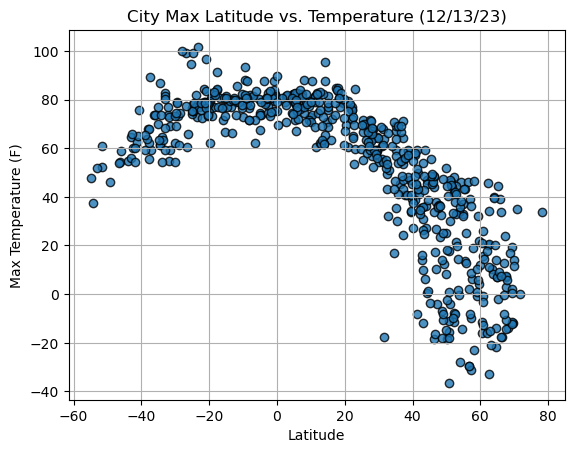

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

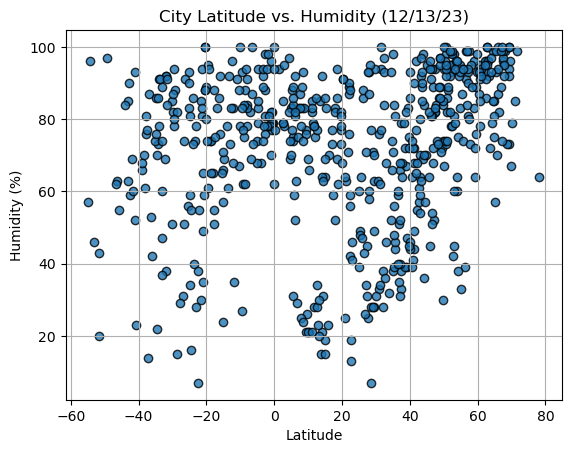

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../put_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

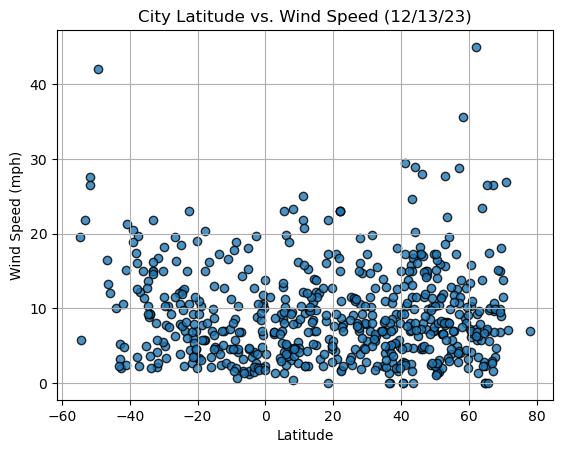

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values,"r-")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nr = {rvalue:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

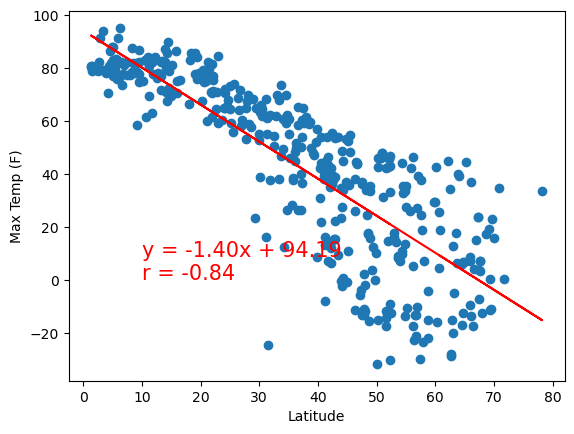

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temp (F)', (10, 0))


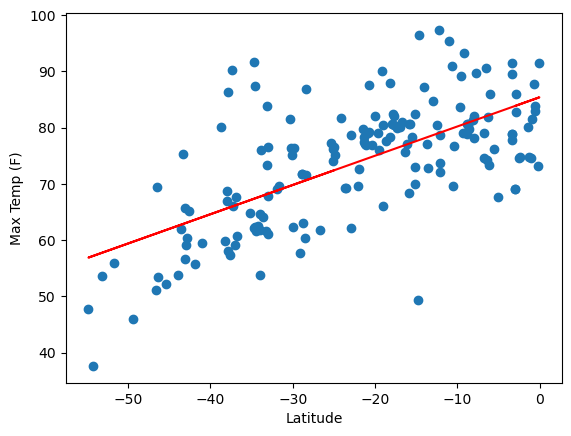

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temp (F)', (-50, 30))


### Humidity vs. Latitude Linear Regression Plot

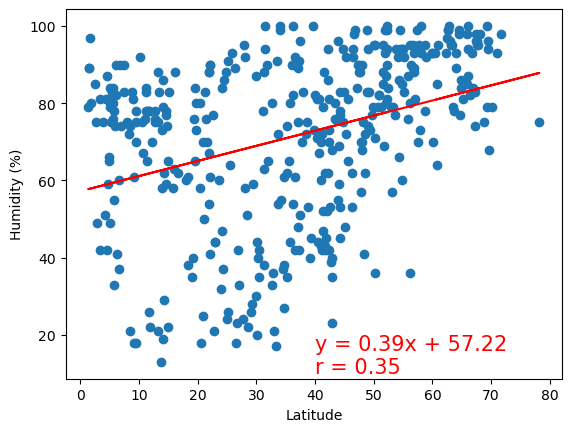

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', (40, 10))

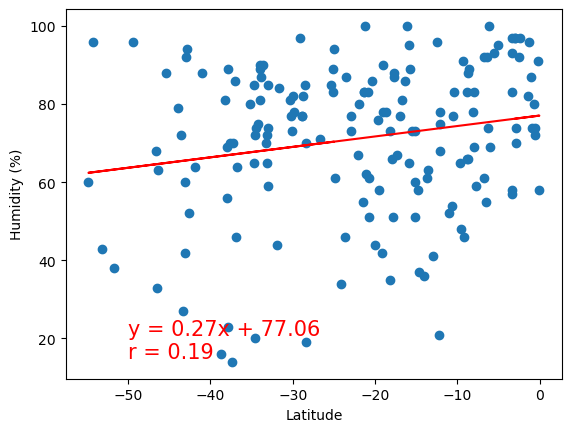

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', (-50, 15))

**Discussion about the linear relationship:** The scatter plots show a slight increase in humidity with higher latitudes in both hemispheres, but the weak correlation (low r-values) indicates that other factors likely have more of an impact on humidity levels than just distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

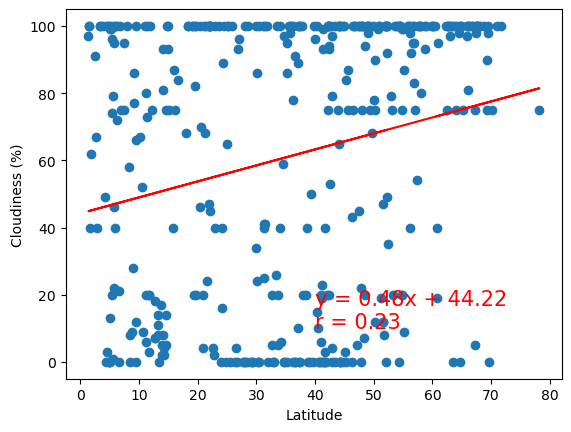

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', (40, 10))

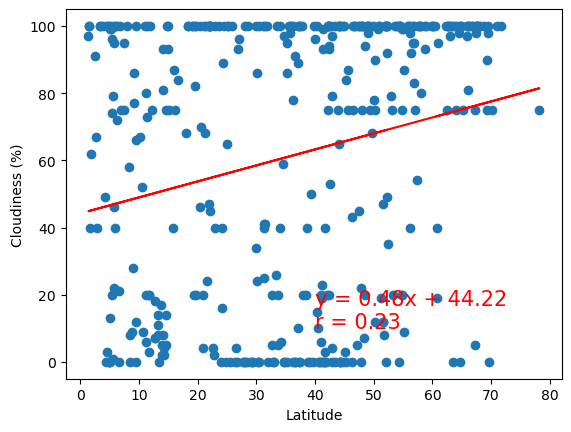

In [21]:
# Southern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', (40, 10))

**Discussion about the linear relationship:** These plots suggest a weak link between a city's latitude and its cloudiness, indicating that factors other than latitude are also important in determining cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

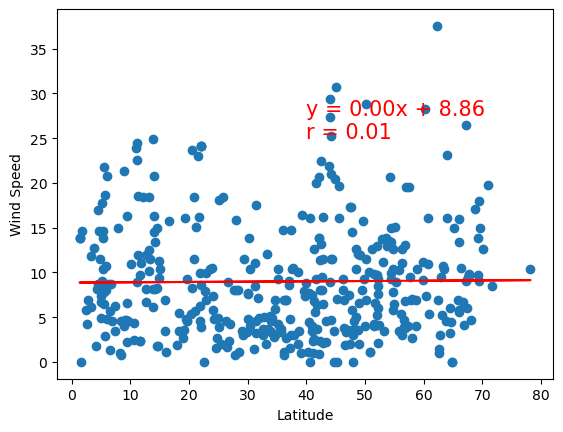

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed', (40, 25))

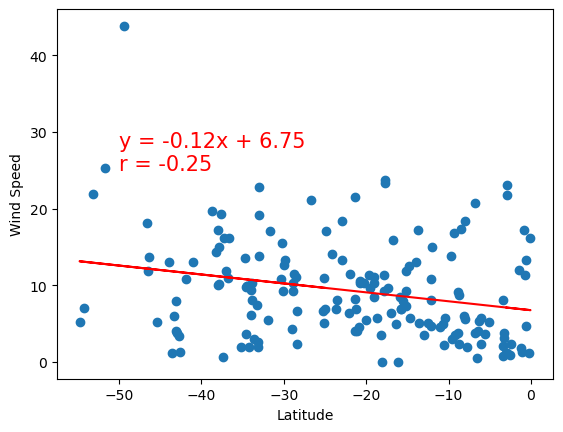

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed', (-50, 25))

**Discussion about the linear relationship:** The Northern Hemisphere shows a very slight increase in wind speed with latitude, while the Southern Hemisphere has a slightly stronger decrease in wind speed as one moves toward the equator, but both correlations are weak.